### Welcome to first hands-On on CNN.   
In this hands-on you will be implementing padding, convolution and pooling operation using numpy.
- Follow the comments provided for each cell to code accordingly.
- To run the code in the cell press **shift+enter**. Make sure you do this for each cell

- Run the bellow cell to import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

- Read the image file '**home.png**'(in current directory) using **mpimg.imread("file_path")** function provided by matplotlib.image module. This function reads the image and returns the pixel intensities in numpy format. Assign this result to variable **img**.
- The dimension of **img** will now be $n_H$ x $n_w$ x $n_c$
- reshape **img** to dimension $m$ x $n_H$ x $n_w$ x $n_c$ and assign it to variable **data**. The dimension **m** will be **one** since we are dealing with one image data. (use numpy's reshape())

Expected output:   
**class 'numpy.ndarray'**  
**Image dimension  (252, 362, 3)**  
**input data dimension  (1, 252, 362, 3)**     

In [2]:
###Start code here
img = mpimg.imread("./home.png")
data = img.reshape([1,img.shape[0],img.shape[1],img.shape[2]])
###End code

print(type(img))
print("Image dimension ",img.shape)
print("Input data dimension ", data.shape)

<class 'numpy.ndarray'>
Image dimension  (252, 362, 3)
Input data dimension  (1, 252, 362, 3)


- Run the below cell to view the image from the data

(-0.5, 361.5, 251.5, -0.5)

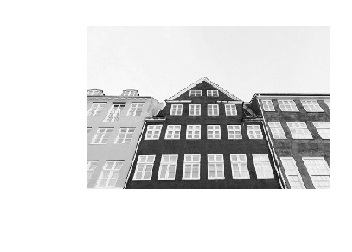

In [3]:
plt.imshow(data[0,:,:,:])
plt.grid(False)
plt.axis("off")

### zero padding
- Define method named zero_pad that performs specified number of zero padding on the input data.  
parameters: 
            data: the data on which padding is performed    
            pad:  the amount of padding around the data    
returns: 
            data_padded: the nd-array after padding  

In [6]:
def zero_pad(data, pad):
    ###Start code here
    data_padded = np.pad(data, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
    return data_padded
    ###End code

- Run the below cell to add zero zero padding using the method define above.   
Expected output:
             [[0. 0. 0. 0.]
             [0. 0. 0. 0.]
             [0. 0. 1. 1.]
             [0. 0. 1. 1.]]

dimension before padding:  (1, 252, 362, 3)
dimension after padding:  (1, 272, 382, 3)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


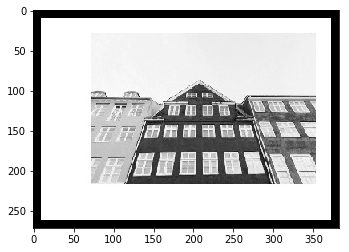

In [7]:
print("dimension before padding: ", data.shape)
img_pad = zero_pad(data, 10)
print("dimension after padding: ", img_pad.shape)
print(img_pad[0,8:12,8:12,1])
plt.imshow(img_pad[0,:,:,:], cmap = "gray")
plt.grid(False)

output1 = np.mean(img_pad)

### Convolution single step  
Define the function named conv_single_step() to convolve a slice of input data using the specified filter  
parameter:  
         - data_slice: the receptive field over which convolution is performed  
         - W: the filter used for convolution  
         - b: the bias term  
returns:
         - Z: convolved output over the receptive field

In [9]:
def conv_single_step(data_slice, W, b):
    ###Start code
    s = np.multiply(data_slice, W)
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)
    ###End code
    return Z

### Strided Convolution
Define method conv_forward to perform strided convolution on the input data.  
use conv_single_step() to perform the convolution at each stride.  
Parameters:  
        - data: input data on which convolution is performed  
        - W: the filter used for convolution operation  
        - b: the bias term  
        - hparams: dictionary defined by {"stride": s, "pad": p}  
returns:  
       - Z: the convolved output  

refer the code snippet provided in the course.  

In [21]:
def conv_forward(data, W, b, hparams):
    ###Start code here
    
    stride=hparams["stride"]
    pad=hparams["pad"]
    m,h_prev,w_prev,c_prev=data.shape
    
    f,f,c_prev,n_c=W.shape
    
    n_h=int((h_prev-f+2*pad)/stride)+1
    n_w=int((w_prev-f+2*pad)/stride)+1
    
    Z=np.zeros((m,n_h,n_w,n_c))
    A_prev_pad=zero_pad(data,pad)
    for i in range(m):
        for h in range(n_h):
            for w in range(n_w):
                for c in range(n_c):
                    w_start=w*stride
                    w_end=w_start+f
                    h_start=h*stride
                    h_end=h_start+f                  
                    Z[i,h,w,c]=conv_single_step(A_prev_pad[i,h_start:h_end,w_start:w_end,:],W[:,:,:,c],b[:,:,:,c])
 
    ###End code
    return Z ##(convolved output)

- The below cell defines the test data for input as well as filter.  
- Run the cell to perfom the convolution operation using the method defined above.   
**Expected output: 0.145**
               

In [22]:
np.random.seed(1)
input_ = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 1}

output_ = conv_forward(input_, W, b, hparameters)
print(np.mean(output_))

-0.007843400138348266


- Run the below cell to define edge_detect filter, the filter values for edge detection has been define for you

In [23]:
edge_detect = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).reshape((3,3,1,1))

- Define a dictionary hparams with stride = 1 and pad = 0
- initialize bias parameter b to zero of dimension (1,1,1,1) hint: use np.zeros()
- Perform strided convolution using the method conv_forward() you defined previously.
  - pass edge_detect filter, bais b and hparams as parameters to perform convolution on the data variable defined previously.
  - assign the result to variable Z

dimension of image before convolution:  (1, 252, 362, 3)
dimension of image after convolution:  (1, 250, 360, 1)


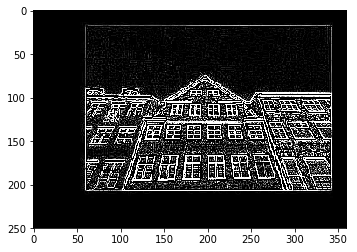

In [25]:
###Start code
hparams = {"pad" : 0,"stride": 1}
b = np.zeros((1, 1, 1, 1))
Z = conv_forward(data, edge_detect, b, hparams)

plt.clf()
plt.imshow(Z[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z.shape)

output2 = np.mean(Z[0,100:200,200:300,0])


##below are the filters for vetical as well as horizontal edge detection, try these filters once you have completed this handson.
##vertical_filter = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]]).reshape(3,3,1,1)
##horizontal_filter = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]]).reshape((3,3,1,1))

### Max pooling
Define method max_pool to perform max pooling on the input data.  
Parameters:  
        - data: input data on which convolution is performed  
        - hparams: dictionary defined by {"f": f, "stride": s} , f is the filter size and s              the number of strides
returns:  
       - output: output after pooling 

refer the code snippet provided in the course.  

In [26]:
def max_pool(input, hparam):
    ###start code
    m, h_prev, w_prev, c_prev = input.shape
    f = hparam["f"]  ## f is the filter size to use for pooling
    stride = hparam["stride"]
    h_out = int(((h_prev - f)/stride) + 1)
    w_out = int(((w_prev -f)/stride) + 1)
    output = np.zeros((m, h_out, w_out, c_prev))
    for i in range(m):
        for c in range(c_prev):
            for h in range(h_out):
                for w in range(w_out):
                    w_start = w * stride
                    w_end = w_start + f
                    h_start = h * stride
                    h_end = h_start + f
                    output[i, h, w, c] = np.max(input[i,h_start:h_end, w_start:w_end, c])
    print(output.shape)
    assert output.shape == (m, h_out, w_out, c_prev)
    return output
    
    
    
    
    
    
    
    
    
    
    
    ###End code
    return output

- Run the below cell to test the method you define above.  
Expected output: **1.075**

In [27]:
pool_params = {"stride" : 2, "f" : 2}
output_ = max_pool(input_, pool_params)
print(np.mean(output_))

(10, 2, 2, 3)
1.0753012177728354


- Define pooling parameters "stride" and filter size "f" as a dictionary named **hparams** with stride = 1 and f = 2
- call the method max_pool with parameters Z (the convolved output) and hparams 

(10, 3, 3, 3)
dimension before pooling : (1, 250, 360, 1)
dimension after pooling : (10, 3, 3, 3)


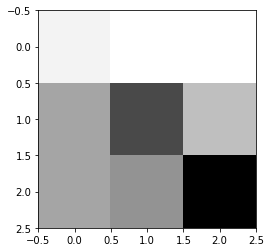

In [28]:
###start code
hparams = {'stride':1, 'f':2}
Z_pool =  max_pool(input_, hparams)
###End code

print("dimension before pooling :", Z.shape)
print("dimension after pooling :", Z_pool.shape)

plt.imshow(Z_pool[0,:,:,0], cmap = "gray")

with open("output.txt", "w+") as file:
    file.write("output1 = %f" %output1)
    file.write("\noutput2 = %f" %output2)